<a href="https://colab.research.google.com/github/nagamamo/financial_data_science/blob/main/8_1_nelson_siegel_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

8.1　パラメトリック・モデルによるイールドカーブの推計

　パラメトリック・モデルは、金利の期間構造を、それに影響を与える複数のパラメータを推計することで、イールドカーブの変動を説明するためのモデルです。もっともよく知られる手法が、米ワシントン大学（当時）のネルソン教授とシーゲル教授が開発したネルソン＝シーゲル・モデル（Nelson=Siegel Model）と呼ばれる手法です。ネルソン＝シーゲル・モデルでは、次のモデルを推計することで、金利の期間構造の変動を4つの要因に分解します。

r(m) = β0+(β1+β2 ){1-exp⁡(-m⁄τ) }m⁄τ
-β2 exp⁡(-m⁄τ)


　ここでは、β0：長期要因、β1：短期要因、β2：中期要因のパラメータ、m：償還期間、τ：構造要因のパラメータ

本例では、nelson-siegel-svensson 0.5.0によるこの実装事例を示します。

In [ ]:
pip install nelson-siegel-svensson

8.2　ライブラリのインポート


　続いて、ライブラリをインポートします。本例で使用するライブラリは、nelson_siegel_svensson 0.5.0、pandas、NumPy、matplotlibです。nelson_siegel_svenssonライブラリは、モデルの推計に用います。またpandasは推計された金利の償還期間別の金利水準をベクトルで表示するため、matplotlibは試算結果の可視化のために利用します。

In [3]:
#[1]ライブラリのインポート
from nelson_siegel_svensson.calibrate import calibrate_ns_ols
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib.pyplot as plt

8.3　初期値の設定とキャリブレーション

　続いて、tを変数とする償還期間のデータとyを変数とする償還期間別の金利の初期値を与えます。本例での初期値は2025年6月26日時点での償還期間ごとの金利水準を、investing.comから採用しています。政策金利が変化した場合の長期金利の変化等の試算は、この初期値の最も期間が短い金利水準を変更してください。

　初期値を与えた上で、ライブラリを用いて、キャリブレートすることで償還期間ごとの金利水準が推計されます。この結果、β0、β1、β2、τのパラメータ推計結果がprint(curve)により表示されます。

In [ ]:
#[2]初期値の設定とキャリブレーション
#初期値の設定
t = np.array([0.0, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0])
y = np.array([0.477, 0.42, 0.59, 0.76, 0.819,0.942, 0.984, 1.437, 2.290, 2.343, 2.642, 2.919])
#キャリブレーション
curve, status = calibrate_ns_ols(t, y, tau0=1.0)  #tauの初期値を1.0とする。
assert status.success
print(curve)

8.4　試算結果の可視化


　パラメータが推計されれば、償還期間ごとの金利水準も併せて算出されます。本節では、この試算結果を、横軸：償還期間、縦軸：金利水準として、初期値と試算結果を可視化します。

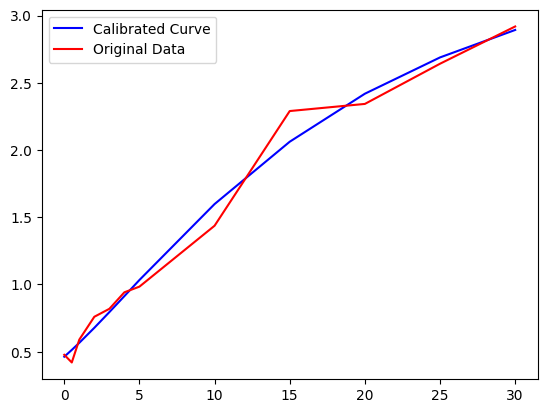

In [6]:
#[3]試算結果の可視化
fig, ax = plt.subplots()
ax.plot(t, curve(t), color='blue', label='Calibrated Curve')
ax.plot(t, y, color='red', label='Original Data')
ax.legend()
plt.show()

8.5　試算結果の保存

　最後に試算結果をpandasデータフレームに保存します。前セルの試算結果はndarray配列で算出されているため、これをpandasデータフレームに保存し、将来の分析に利用します。

In [7]:
#[4]試算結果の保存
df=pd.DataFrame({'Maturity(Years)':t,'Yield (%)':curve(t)})
df = df.set_index("Maturity(Years)")
df

,Yield (%)
Maturity(Years),
0.0,0.462949
0.5,0.513367
1.0,0.566307
2.0,0.677901
3.0,0.794529
4.0,0.913667
5.0,1.033345
10.0,1.598187
15.0,2.061823
